# Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

#Setting for clean visuals
sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(12,6)

# Loading the data

In [6]:
# Specify the path to the zip file
zip_file_path = r'C:\Users\Ishika\Desktop\projects\Anime recommendation system\archive (2).zip'
# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as z:
    # List the contents of the zip file
    print(z.namelist())
    
    # Read the train.csv file into a DataFrame
    with z.open('anime.csv') as f:
        anime = pd.read_csv(f)
    with z.open('rating.csv') as f:
        ratings = pd.read_csv(f)

['anime.csv', 'rating.csv']


# About data

In [8]:
print(anime.shape)
print(ratings.shape)

(12294, 7)
(7813737, 3)


In [9]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [10]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [11]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


# Checking missing value

In [13]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [14]:
ratings.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

# Data cleaning

In [16]:
anime['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [17]:
anime['episodes']=anime['episodes'].replace('Unknown',np.nan).astype(float)

In [18]:
print(ratings['user_id'].nunique())
print(ratings['anime_id'].nunique())

73515
11200


In [19]:
ratings_cleaned=ratings[ratings['rating']!=-1]

# EDA

## Anime rating distribution

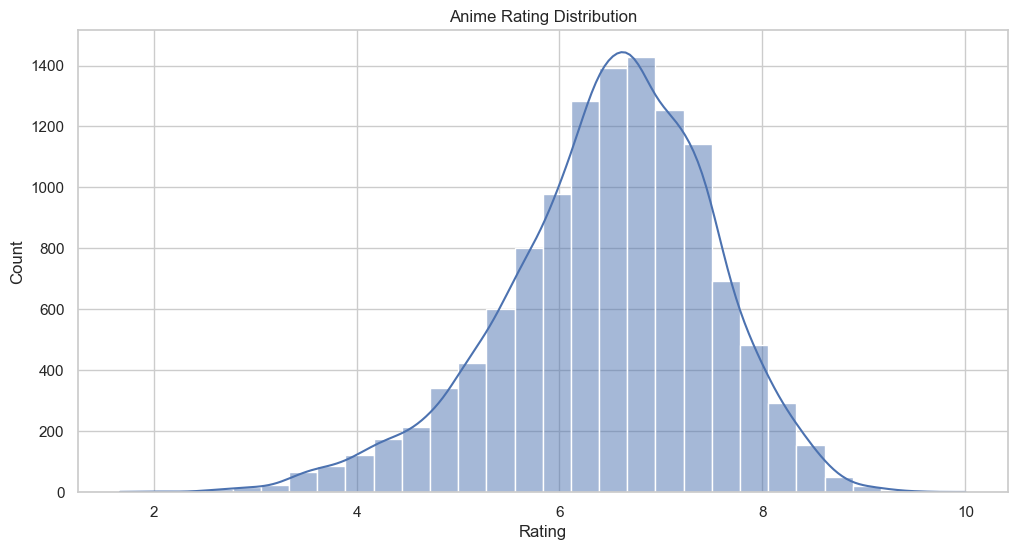

In [22]:
sns.histplot(anime['rating'].dropna(),bins=30,kde=True)
plt.title('Anime Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## Anime Types

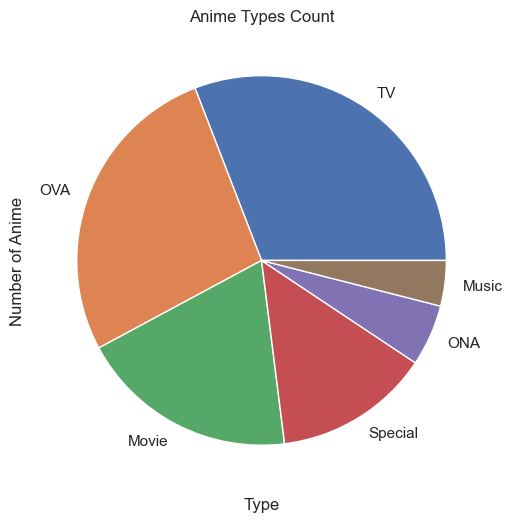

In [24]:
anime['type'].value_counts().plot(kind='pie')
plt.title('Anime Types Count')
plt.xlabel('Type')
plt.ylabel('Number of Anime')
plt.xticks(rotation=45)
plt.show()

## Top Genres

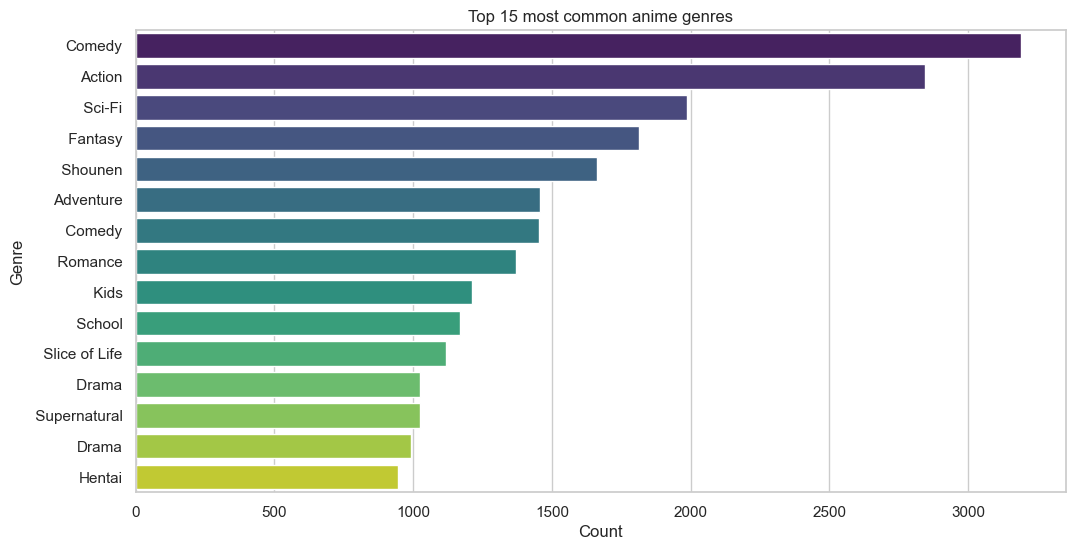

In [26]:
from collections import Counter
genre_count=Counter()
for genres in anime['genre'].dropna():
    for g in genres.split(','):
        genre_count[g]+=1
genre_df=pd.DataFrame(genre_count.items(),columns=['Genre','Count'])
genre_df=genre_df.sort_values(by='Count',ascending=False)

#plot
sns.barplot(data=genre_df.head(15), x='Count', y='Genre', hue='Genre', palette='viridis', legend=False)

plt.title('Top 15 most common anime genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

## Top 20 Anime my members

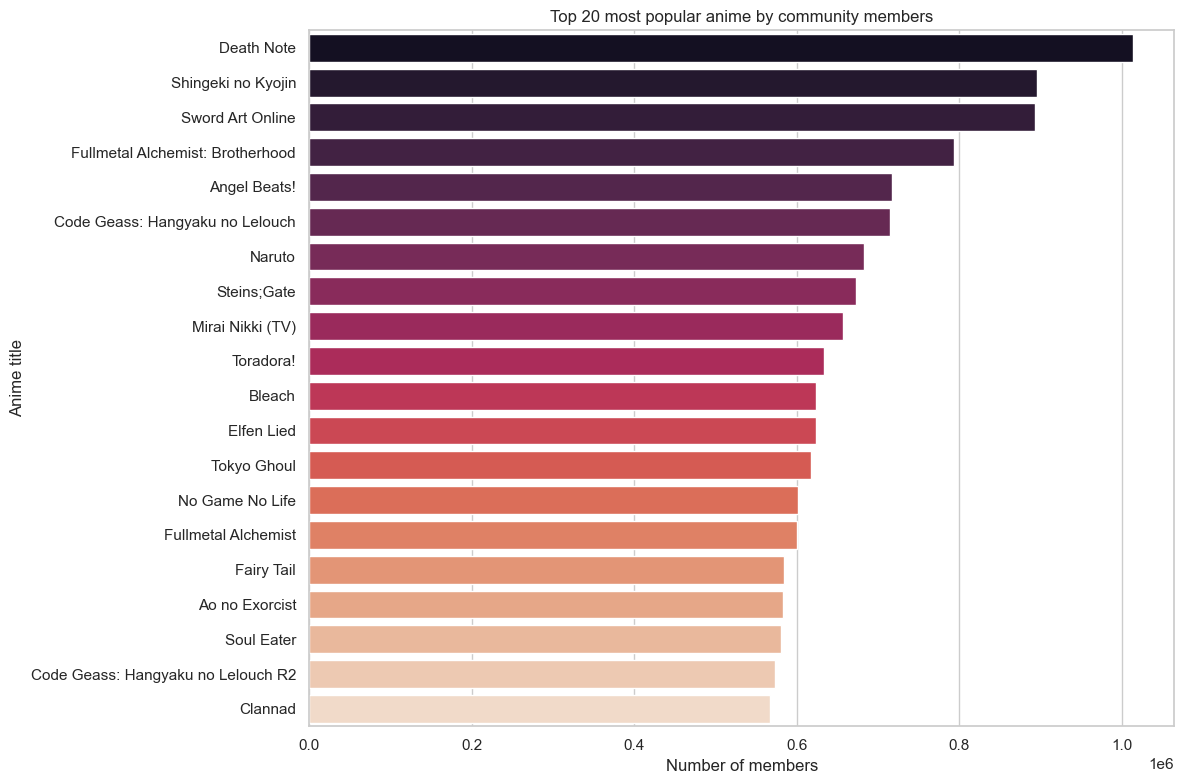

In [28]:
top_members=anime[['name','members']].dropna().sort_values(by='members',ascending=False).head(20)

#barplot
plt.figure(figsize=(12,8))
sns.barplot(data=top_members, x='members', y='name', hue='name', palette='rocket', legend=False)

plt.title('Top 20 most popular anime by community members')
plt.xlabel('Number of members')
plt.ylabel('Anime title')
plt.tight_layout()
plt.show()

## Side-by-side: Avg anime rating vs Avg user rating distribution

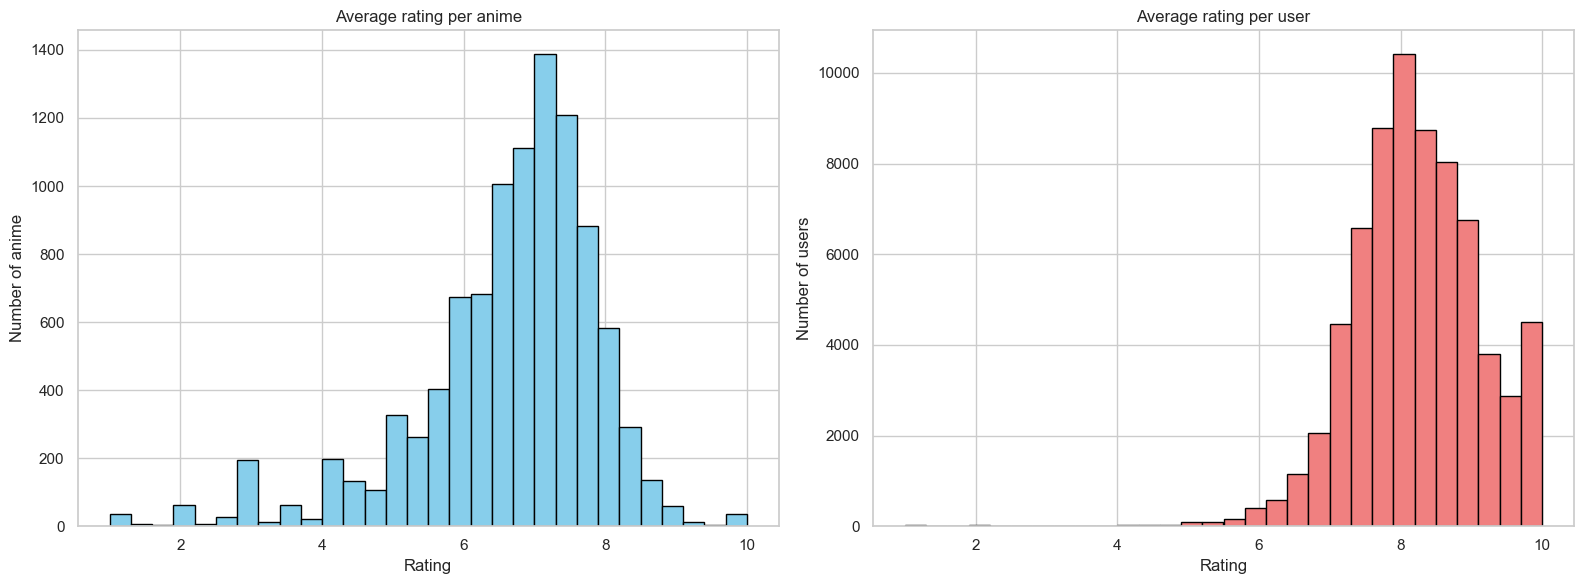

In [30]:
anime_avg_rating=ratings_cleaned.groupby('anime_id')['rating'].mean()
user_avg_rating=ratings_cleaned.groupby('user_id')['rating'].mean()
fig,axes=plt.subplots(1,2,figsize=(16,6))

#Anime avg rating
axes[0].hist(anime_avg_rating,bins=30,color='skyblue',edgecolor='black')
axes[0].set_title('Average rating per anime')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Number of anime')

#User avg rating
axes[1].hist(user_avg_rating,bins=30,color='lightcoral',edgecolor='black')
axes[1].set_title('Average rating per user')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Number of users')

plt.tight_layout()
plt.show()

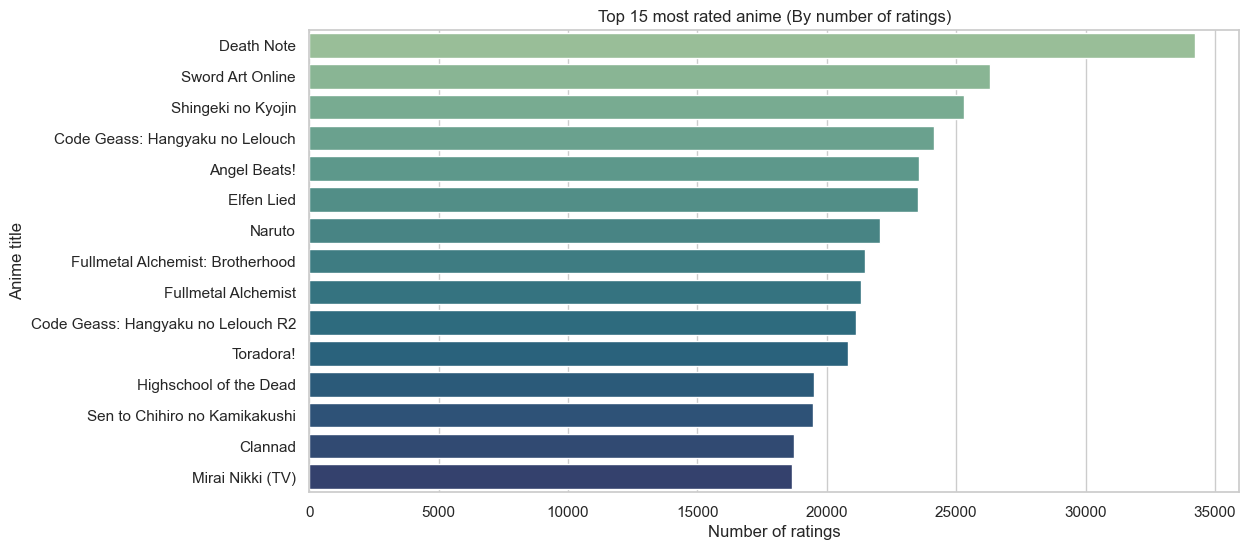

In [31]:
anime_ratings_counts=ratings_cleaned['anime_id'].value_counts().reset_index()
anime_ratings_counts.columns=['anime_id','num_ratings']

top_rated_anime=pd.merge(anime_ratings_counts,anime[['anime_id','name']],on='anime_id')
top_rated_anime=top_rated_anime.head(15)
top_rated_anime[['name','num_ratings']]

sns.barplot(data=top_rated_anime,x='num_ratings',y='name',hue='name',palette='crest')
plt.title('Top 15 most rated anime (By number of ratings)')
plt.xlabel('Number of ratings')
plt.ylabel('Anime title')
plt.show()

## Anime genre word cloud

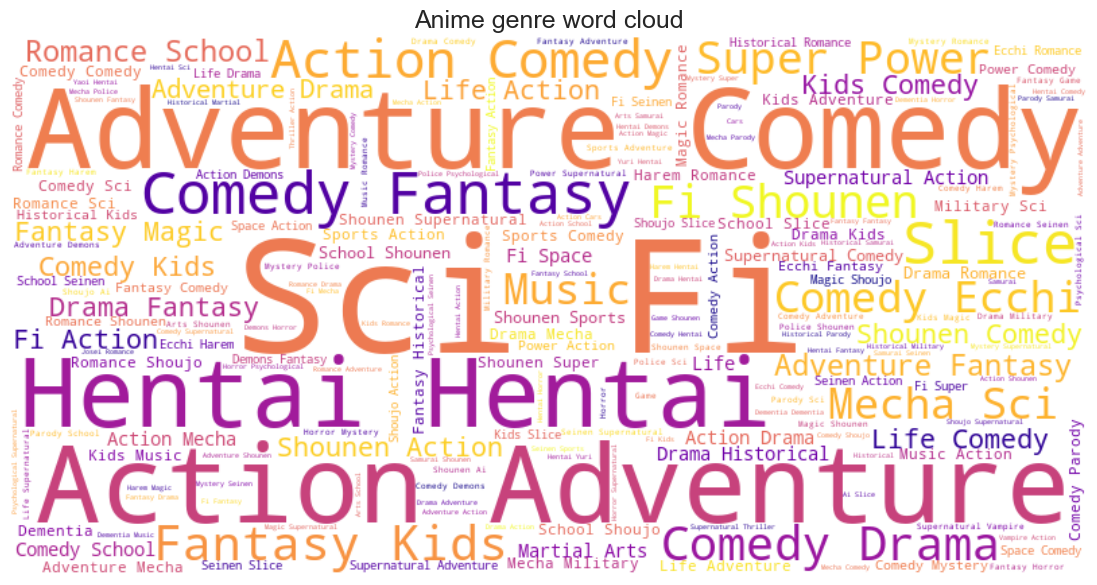

In [33]:
from wordcloud import WordCloud
genre_data=anime['genre'].dropna()
all_genre=','.join(genre_data)
genre_words=' '.join(all_genre.replace(',',' ').split())
wordcloud=WordCloud(
    width=800,height=400,
    background_color='white',
    colormap='plasma').generate(genre_words)

#plot
plt.figure(figsize=(14,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Anime genre word cloud',fontsize=18)
plt.show()

## Rating Distribution by type

C:\Users\Ishika\AppData\Local\Temp\ipykernel_11592\3143961695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=anime,x='type',y='rating',palette='pastel')


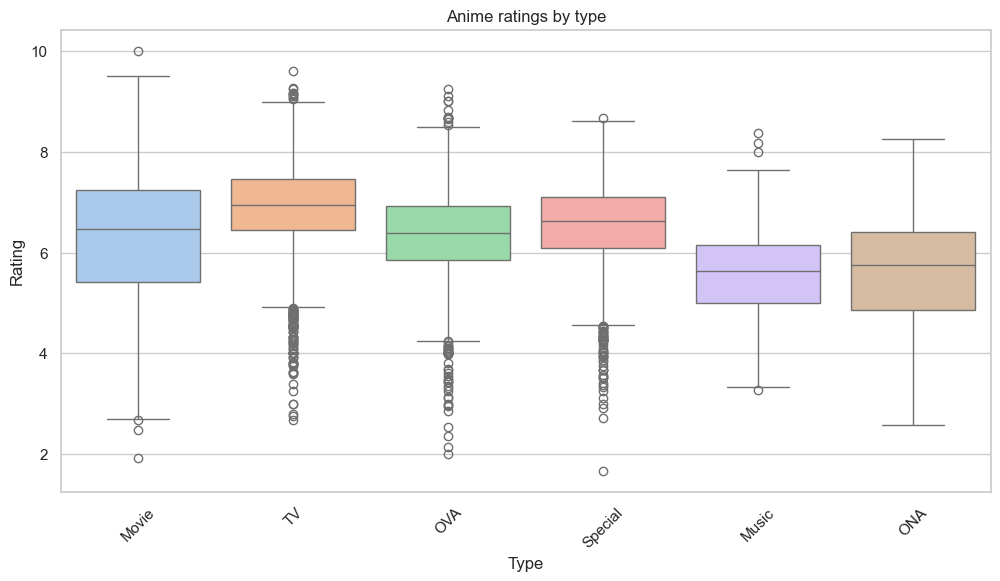

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(data=anime,x='type',y='rating',palette='pastel')
plt.title('Anime ratings by type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# Recommender system

## 1. Popularity-Based Recommender

In [38]:
anime_ratings_counts=ratings_cleaned['anime_id'].value_counts().reset_index()
anime_ratings_counts.columns=['anime_id','num_ratings']

top_rated_anime=pd.merge(anime_ratings_counts,anime[['anime_id','name']],on='anime_id')
top_rated_anime=top_rated_anime.head(10)
top_rated_anime[['name','num_ratings']]

,name,num_ratings
0,Death Note,34226
1,Sword Art Online,26310
2,Shingeki no Kyojin,25290
3,Code Geass: Hangyaku no Lelouch,24126
4,Angel Beats!,23565
5,Elfen Lied,23528
6,Naruto,22071
7,Fullmetal Alchemist: Brotherhood,21494
8,Fullmetal Alchemist,21332
9,Code Geass: Hangyaku no Lelouch R2,21124


## 2. Content-based Recommender

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
#to calculate cosine similarity between two vectors efficiently
from sklearn.metrics.pairwise import linear_kernel

anime['genre']=anime['genre'].fillna('')
tfidf=TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf.fit_transform(anime['genre'])

cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)

anime_indices=pd.Series(anime.index,index=anime['name']).drop_duplicates()
def RecommendContent(title,top_n=10):
    idx=anime_indices.get(title)
    if idx is None:
        print('Anime not found')
        return
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores,key=lambda x: x[1],reverse=True)[1:top_n+1]
    anime_indices_top=[i[0] for i in sim_scores]
    return anime['name'].iloc[anime_indices_top]

In [62]:
RecommendContent('Spirited Away')

Anime not found
